In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [3]:
dia=pd.read_csv("diabetes.csv")
df=dia.copy()
df=df.dropna()
df.head()  #outcome bağımlıdır ve 0 1 den oluşur

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df["Outcome"].value_counts() #şeker hastası olup olmaması

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

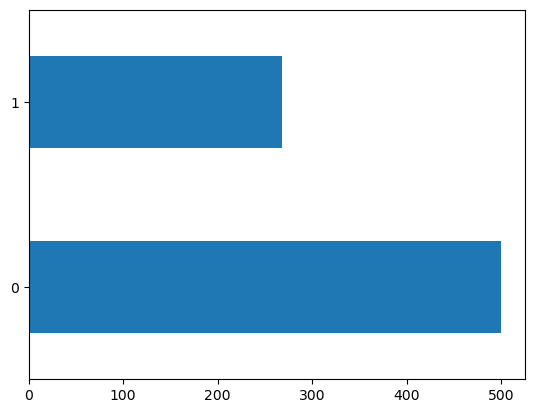

In [7]:
df["Outcome"].value_counts().plot.barh()

In [4]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)


In [9]:
loj=sm.Logit(y,X)
loj_mdl=loj.fit() #model kuruldu
loj_mdl.summary() #anlamlı anlamsız bilgiler sunuldu  p 0.0025 ....

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sun, 12 May 2024   Pseudo R-squ.:                 0.05922
Time:                        17:15:21   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [5]:
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")
loj_mdl=loj.fit(X,y)
loj_mdl

LogisticRegression(solver='liblinear')

In [6]:
loj_mdl.coef_
y_pred=loj_mdl.predict(X) #genel tahmin
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [19]:
#sınıflandırma işlemleri olacak kanser mi değil mi  kredi kartı borcunu ödedi mi ödemedimi 1.sınıf işlem
confusion_matrix(y,y_pred) #karmaşıklık matrisi  gerçekte 1 iken 1 olan(448)  gerçekte 0 iken 1 denilenler (52)
#gerçekte 1 iken 0 denilenler(121) gerçekte 0 iken 0 denilenler (147)

array([[448,  52],
       [121, 147]], dtype=int64)

In [20]:
accuracy_score(y,y_pred)# doğru sınıflandırma oranımız

0.7747395833333334

In [23]:
print(classification_report(y,y_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [24]:
loj_mdl.predict(X)[0:5] #ben sadece 0 ve 1 olasılıklarını isterim deftere yazıldığı gibi yani bana 0 1 tahmin değerlerini verme

array([1, 0, 1, 0, 1], dtype=int64)

In [25]:
loj_mdl.predict_proba(X)[0:10] #olasılık değerleri

array([[0.35093834, 0.64906166],
       [0.9167465 , 0.0832535 ],
       [0.22496175, 0.77503825],
       [0.92105964, 0.07894036],
       [0.16807458, 0.83192542],
       [0.79857716, 0.20142284],
       [0.87973055, 0.12026945],
       [0.27755404, 0.72244596],
       [0.32068936, 0.67931064],
       [0.9223939 , 0.0776061 ]])

In [30]:
loj_mdl.predict_proba(X)[0:10][:,0:2] #baştaki sütun 0 sınıfına aittir   1 e ait sınıflar sağ taraftakiler 
#mesela 2.si 1 olma olasılığı çok düşük 0.08 yani 0dır   3.sü mesela 1 olma olasılığı çok yüksek  
#mesela 5. de tahmin edilen değerin 1 olması gerekin %83 oranı var ama gerçek değeri 0 çıkmış

array([[0.35093834, 0.64906166],
       [0.9167465 , 0.0832535 ],
       [0.22496175, 0.77503825],
       [0.92105964, 0.07894036],
       [0.16807458, 0.83192542],
       [0.79857716, 0.20142284],
       [0.87973055, 0.12026945],
       [0.27755404, 0.72244596],
       [0.32068936, 0.67931064],
       [0.9223939 , 0.0776061 ]])

In [27]:
y[0:10] #gerçek değerler  

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [32]:
loj_mdl.predict(X)[0:10] #tahmin edilen değerler mesela ilkd değeri doğru tahmin etmişiz 

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [33]:
y_probs=loj_mdl.predict_proba(X)
y_probs=y_probs[:,1]

In [35]:
y_probs[0:10]

array([0.64906166, 0.0832535 , 0.77503825, 0.07894036, 0.83192542,
       0.20142284, 0.12026945, 0.72244596, 0.67931064, 0.0776061 ])

In [37]:
y_pred=[1 if i >0.5 else 0 for i in y_probs] #tabloda 0.5ten büyük olanları yazdırsın  
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [38]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
logit=roc_auc_score(y,loj_mdl.predict(X))
fpr,tpr,thresholds=roc_curve(y,loj_mdl.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC(area=%0.2f)')